<a href="https://colab.research.google.com/github/fowardelcac/Abandono-Escolar/blob/main/Notebooks/conclusiones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/fowardelcac/Abandono-Escolar.git

Cloning into 'Abandono-Escolar'...
remote: Enumerating objects: 51, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (46/46), done.
remote: Total 51 (delta 7), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (51/51), 575.69 KiB | 6.54 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
sector = pd.read_csv('/content/Abandono-Escolar/Dataset/datasets2/Data_with_sector.csv').drop('Unnamed: 0', axis = 1)
df = pd.read_csv('/content/Abandono-Escolar/Dataset/datasets2/df.csv').drop('Unnamed: 0', axis = 1)

In [7]:
df.head()

,Marital status,attendance,Esn,Debtor,fees,Gender,scholarship,Target,Sector_Agronomy and Veterinary Science,Sector_Business and Communication,...,Age at enrollment,Unemployment rate,Inflation rate,GDP,Enrolled1,Approved1,Enrolled2,Approved2,Tasa_1st,Tasa_2nd
0,0,1,0,0,1,1,0,0,0,0,...,20,10.8,1.4,1.74,0,0,0,0,0.000000,0.000000
1,0,1,0,0,0,1,0,1,0,0,...,19,13.9,-0.3,0.79,6,6,6,6,100.000000,100.000000
2,0,1,0,0,0,1,0,0,0,0,...,19,10.8,1.4,1.74,6,0,6,0,0.000000,0.000000
3,0,1,0,0,1,0,0,1,0,1,...,20,9.4,-0.8,-3.12,6,6,6,5,100.000000,83.333333
4,1,0,0,0,1,0,0,1,0,0,...,45,13.9,-0.3,0.79,6,5,6,6,83.333333,100.000000


# ¿Como esta distribuida la edad de los estudiantes?

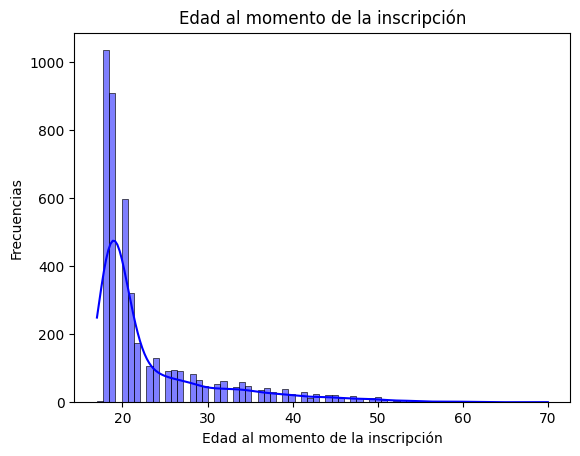

In [8]:
sns.histplot(df['Age at enrollment'], kde=True, color='blue')  # kde=True agrega una estimación de la densidad del kernel.
plt.xlabel('Edad al momento de la inscripción')
plt.ylabel('Frecuencias')
plt.title('Edad al momento de la inscripción')
plt.show()

In [9]:
df['Age at enrollment'].describe()

count    4424.000000
mean       23.265145
std         7.587816
min        17.000000
25%        19.000000
50%        20.000000
75%        25.000000
max        70.000000
Name: Age at enrollment, dtype: float64

Apartir del grafico y algunos estadisticos, podemos ver que el 75% de los estudiantes se inscriben para comenzar sus estudios universitarios entre los 17 y 25 años.